In [1]:
import os
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Utilities.Utils import *
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [23]:
# Read the data in
orig_data = pd.read_csv("../datasets/iris_csv.csv")
# Note the feature columns (excluding the class columns)
feature_cols = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
# Extract the feature columns only
x = orig_data[feature_cols]
# Scale the data to standard
x = StandardScaler().fit_transform(x)

# Extract the class in preparation for one hot encoding
label_col = 'class'
# factorize the labels to exist as [1,2,3]
y = orig_data[label_col]

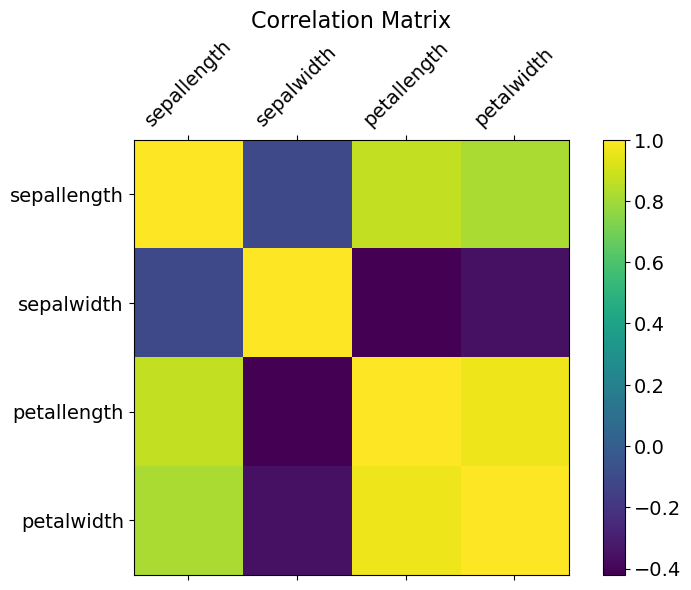

In [24]:
# Plot the correlation matrix of the dataset
fig = plt.figure(figsize=(8,6))
plt.matshow(orig_data.corr(numeric_only=True), fignum=0)
plt.xticks(range(orig_data.select_dtypes(['number']).shape[1]), orig_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(orig_data.select_dtypes(['number']).shape[1]), orig_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

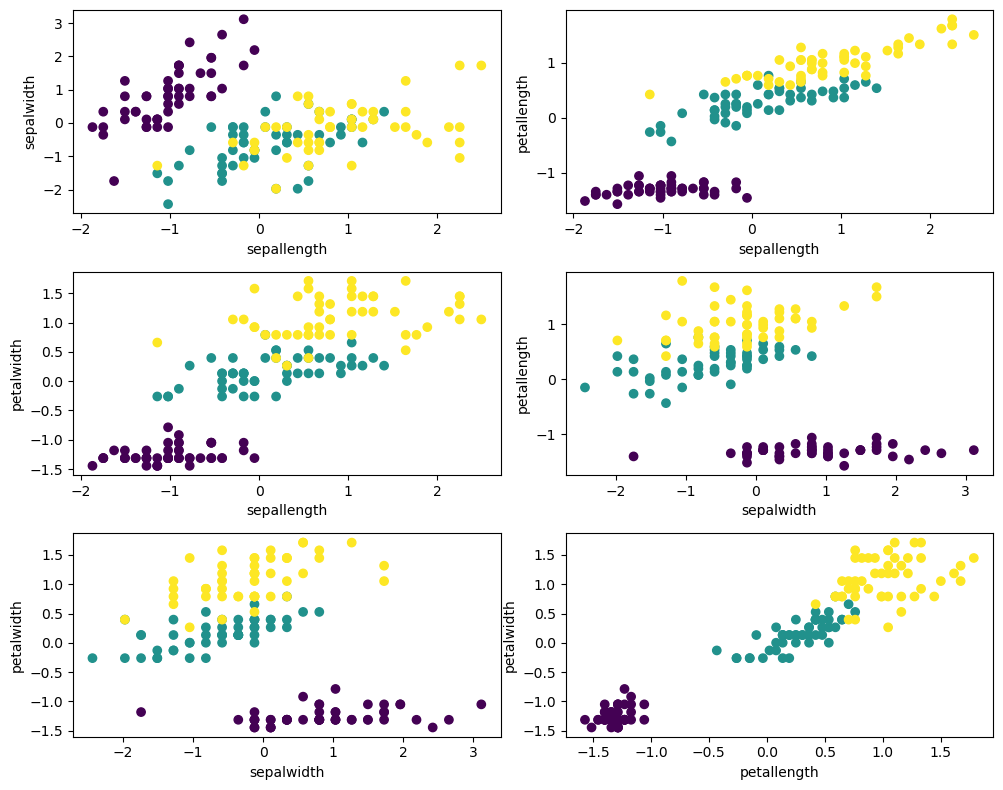

In [26]:
# For each possible combination of features, plot the features together and color by class
combos = list(itertools.combinations(feature_cols, 2))
fig = plt.figure(figsize=(10,8))
total_cols = int(len(combos)**0.5)
total_rows = len(combos) // total_cols
if len(combos) % total_cols != 0: total_rows += 1
for index, (x_name, y_name) in enumerate(combos):
    ax = fig.add_subplot(total_rows, total_cols, index+1)
    curr_x = x[:, feature_cols.index(x_name)]
    curr_y = x[:, feature_cols.index(y_name)]
    color = pd.factorize(orig_data[label_col])[0]+1
    ax.scatter(curr_x,curr_y,c=color)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
fig.tight_layout()
plt.show()

Explained Variance Ratio: [0.72770452 0.23030523]


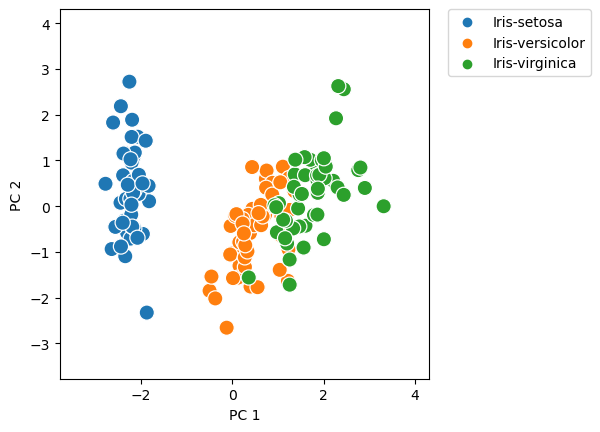

In [28]:
# Try PCA on data
N_COMPONENTS = 2
pca = PCA(n_components=N_COMPONENTS)
pca_result = pca.fit_transform(x)
pca_result_df = pd.DataFrame({'PC 1': pca_result[:,0], 'PC 2': pca_result[:,1], 'label': y})
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

fig, ax = plt.subplots()
sns.scatterplot(x='PC 1', y='PC 2', hue='label', data=pca_result_df, ax=ax, s=120)
lim = (pca_result.min()-1, pca_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

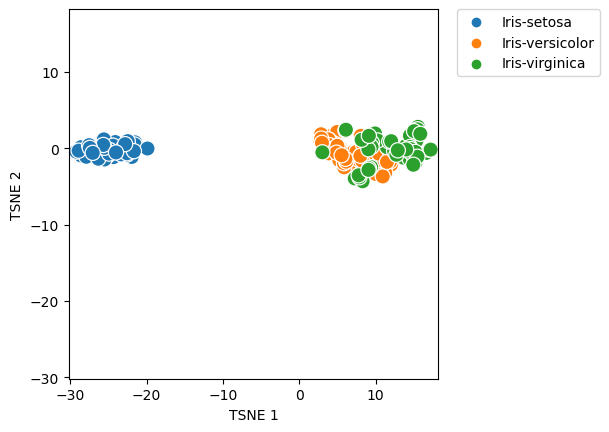

In [30]:
# Try some TSNE on dataset
N_COMPONENTS = 2
tsne = TSNE(n_components=N_COMPONENTS)
tsne_result = tsne.fit_transform(x)
tsne_result_df = pd.DataFrame({'TSNE 1': tsne_result[:,0], 'TSNE 2': tsne_result[:,1], 'label': y})

fig, ax = plt.subplots()
sns.scatterplot(x='TSNE 1', y='TSNE 2', hue='label', data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min()-1, tsne_result.max()+1)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)